In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os
import h5py

from skimage.util.montage import montage2d
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

Show values of pet and ct

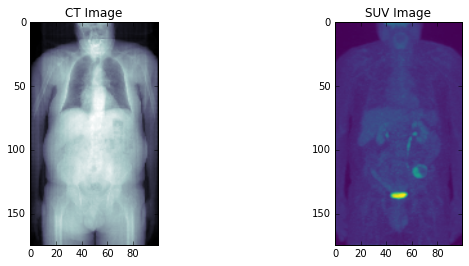

In [63]:
with h5py.File(os.path.join('..', 'input', 'lab_petct_vox_5.00mm.h5'), 'r') as p_data:
    id_list = list(p_data['ct_data'].keys())
    ct_image = p_data['ct_data'][id_list[0]].value
    pet_image = p_data['pet_data'][id_list[0]].value

ct_proj = np.mean(ct_image, 1)[::-1]
suv_max = np.sqrt(np.max(pet_image, 1)[::-1])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 4))
ax1.imshow(ct_proj, cmap = 'bone')
ax1.set_title('CT Image')
ax2.imshow(suv_max, cmap = 'viridis')
ax2.set_title('SUV Image')

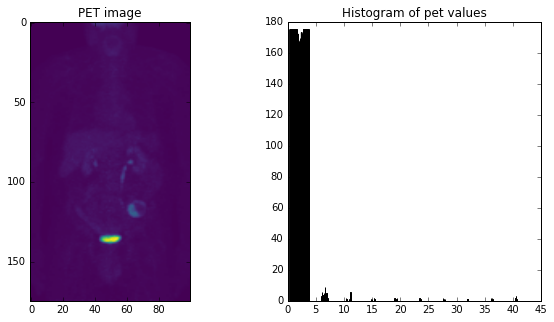

In [78]:
pet = np.max(pet_image, 1)[::-1]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.imshow(pet, cmap='viridis')
ax1.set_title('PET image')

ax2.hist(pet, bins=10)
ax2.set_title('Histogram of pet values')

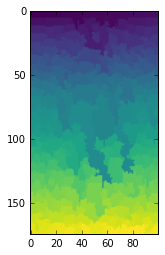

In [79]:
plt.imshow(slic(pet, n_segments=500, compactness=0.1), cmap='viridis')

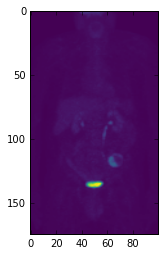

In [81]:
plt.imshow(pet, cmap='viridis')